In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
warnings.filterwarnings('ignore')

In [3]:
data = './adult.csv'
df = pd.read_csv(data, header=None, sep=',\s')

In [4]:
df.shape

(32561, 15)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [7]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
categorical = [c for c in df.columns if df[c].dtype == 'O']

print('카테고리 변수의 수 : ', len(categorical))
print('카테고리 변수 : ', categorical)

카테고리 변수의 수 :  9
카테고리 변수 :  ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [10]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [11]:
# 결측치 처리
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [12]:
# 정말 결측치가 없는지 확인
for c in categorical:
    print(df[c].value_counts())
# 본 코드를 통해 데이터 중간중간에 '?'가 작성되어 있는 모습을 확인할 수 있다.

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [13]:
for c in categorical:
    print(df[c].value_counts()/np.float64(len(df)))
# 파이썬에선 ?를 결측치로 처리해주기 못하기 때문에, 이전 결측치를 확인해보았을 때 없다고 나타난 것이다.

workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: count, dtype: float64
marital_status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: coun

In [14]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [15]:
df.workclass.value_counts()
# 즉, ?가 결측치의 값

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [16]:
# ?를 NaN으로 교체
df['workclass'].replace('?', np.NaN, inplace=True)

In [17]:
df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [18]:
df.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [73]:
df['occupation'].replace('?', np.NaN, inplace=True)
df['native_country'].replace('?', np.NaN, inplace=True)

In [74]:
df.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [75]:
df.native_country.value_counts()

native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [76]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
dtype: int64

In [77]:
# 위까진 범주형
# 이제 아래부터 숫자형
numerical = [n for n in df.columns if df[n].dtype != 'O']

print('연속형 데이터 개수 : ', len(numerical))
print('연속형 데이터 : ', numerical)

연속형 데이터 개수 :  6
연속형 데이터 :  ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [78]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [79]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [80]:
X = df.drop(['income'], axis=1)
y = df['income']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [83]:
X_train.dtypes # 데이터 타입 파악

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [84]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O'] # 범주형 컬럼
categorical
# 기존 사용했던 범주형은 타겟을 지정해주고 진행했던 것.
# 따라서 맨 위와 컬럼값들이 다르다.
    # -> income부분을 삭제해야 할 필요가 있다.

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [85]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O'] # 숫자형 컬럼
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [86]:
print(X_train[categorical].isnull().mean()) # 비율
print()
print(X_train[categorical].isnull().sum()) # 개수

workclass         0.055590
education         0.000000
marital_status    0.000000
occupation        0.055897
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.017769
dtype: float64

workclass         1267
education            0
marital_status       0
occupation        1274
relationship         0
race                 0
sex                  0
native_country     405
dtype: int64


In [87]:
X_train[numerical].isnull().mean()

age               0.0
fnlwgt            0.0
education_num     0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
dtype: float64

In [88]:
# 해당 부분에서 결측지가 있는 컬럼들만 모아서 출력
for col in categorical:
    if X_train[col].isnull().mean() > 0:
        print(col, X_train[col].isnull().mean()) # 전체 데이터 중 몇 퍼센트가 결측치일지 판단

workclass 0.05558968058968059
occupation 0.055896805896805894
native_country 0.01776939276939277


In [89]:
# 가장 많이 나온 데이터(mode()에서 [0]번째(내림차순))로 대체
for df_ in [X_train, X_test]:
    df_['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df_['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df_['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

In [90]:
print(X_train[categorical].isnull().mean())
print()
print(X_train[categorical].isnull().sum())

workclass         0.0
education         0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
native_country    0.0
dtype: float64

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64


In [91]:
print(X_test[categorical].isnull().mean())
print()
print(X_test[categorical].isnull().sum())

workclass         0.0
education         0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
native_country    0.0
dtype: float64

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64


In [92]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
19749,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Wife,White,Female,United-States
1216,Self-emp-not-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,United-States
27962,State-gov,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
23077,Local-gov,HS-grad,Divorced,Exec-managerial,Not-in-family,White,Female,United-States
10180,Private,11th,Never-married,Priv-house-serv,Own-child,White,Female,United-States


# 원-핫 인코딩(One-Hot encoding)
: 범주형 데이터를 이진 벡터로 변환하는 기법(이진 벡터 : [x, x, x, ..., x] x는 이진(0, 1) = 0 또는 1로 나타내고 있는 것)

- 특히 범주형 변수가 많은 분류문제에서 유용하게 사용된다.
- 이진 벡터 -> 해당 범주의 위치만 1이고, 나머지는 0으로 변환

ex) [ 빨강, 초록, 파랑 ] = 3개의 범주를 가진다. [ x, x, x] 형태의 이진벡터로 나타낼 수 있다는 의미이다.

-> 매핑 - 빨강을 0으로, 초록을 1로, 파랑을 2로

    빨강만 --> [1, 0, 0]

    초록만 --> [0, 1, 0]

    파랑만 --> [0, 0, 1]

In [93]:
onehot_sam = pd.DataFrame({
    '색상' : ['빨강', '파랑', '빨강', '초록', '파랑', '초록']
})

print(onehot_sam)

   색상
0  빨강
1  파랑
2  빨강
3  초록
4  파랑
5  초록


In [94]:
one_hot_encoded_sample = pd.get_dummies(onehot_sam, columns=['색상'])
one_hot_encoded_sample

,색상_빨강,색상_초록,색상_파랑
0,True,False,False
1,False,False,True
2,True,False,False
3,False,True,False
4,False,False,True
5,False,True,False


In [95]:
import category_encoders as ce

In [96]:
encoder = ce.OneHotEncoder(cols=categorical)

X_train = encoder.fit_transform(X_train) # 정규화
X_test = encoder.transform(X_test)

In [97]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
19749,34,1,0,0,0,0,0,0,0,56460,...,0,0,0,0,0,0,0,0,0,0
1216,48,1,0,0,0,0,0,0,0,243631,...,0,0,0,0,0,0,0,0,0,0
27962,23,0,1,0,0,0,0,0,0,56402,...,0,0,0,0,0,0,0,0,0,0
23077,56,0,0,1,0,0,0,0,0,255406,...,0,0,0,0,0,0,0,0,0,0
10180,17,0,0,0,1,0,0,0,0,297246,...,0,0,0,0,0,0,0,0,0,0


In [98]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
14160,27,0,0,0,1,0,0,0,0,160178,...,0,0,0,0,0,0,0,0,0,0
27048,45,0,1,0,0,0,0,0,0,50567,...,0,0,0,0,0,0,0,0,0,0
28868,29,0,0,0,1,0,0,0,0,185908,...,0,0,0,0,0,0,0,0,0,0
5667,30,0,0,0,1,0,0,0,0,190040,...,0,0,0,0,0,0,0,0,0,0
7827,29,1,0,0,0,0,0,0,0,189346,...,0,0,0,0,0,0,0,0,0,0


In [99]:
X_train.shape, X_test.shape # 컬럼 수의 변화를 파악할 수 있다.(이전과 비교하여)

((22792, 105), (9769, 105))

# 정규화
- StandardScaler : 특성이 평균이 0, 분산이 1이 되도록 변환해서 정규분포에 가깝게 조정한다.
- RobustScaler : 중앙값과 사분위수를 이용해서 분포를 조정한다.(이상치에 민감하지 않은 특징을 가지고 있다.)
- MinMaxScaler : 데이터의 최대, 최솟값을 기준으로 0과 1 사이의 값으로 조정한다.(이상치에 민감)
- MaxAbsScaler : 데이터의 절대 최댓값을 기준으로 -1과 1 사이의 값으로 저장한다.(희소 데이터)

In [100]:
cols = X_train.columns

In [101]:
# 본 시간에는 'RobustScaler'을 사용하고자 한다.
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [103]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.15,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.018859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.55,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.547177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.70,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.019344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.95,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.645697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
# 나이브베이즈로 학습 진행
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [106]:
# 위 코드까지 해서 머신러닝을 사용할 준비 완료

# 이제 '예측처리'
y_pred = gnb.predict(X_test)
y_pred # 예측 데이터들을 확인할 수 있다.

array(['<=50K', '>50K', '>50K', ..., '<=50K', '>50K', '>50K'], dtype='<U5')

In [109]:
# 정확도 파악
from sklearn.metrics import accuracy_score

print('Accuracy Score : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy Score : 0.8005


In [110]:
# training 데이터에 대해서도 점수를 내기
y_pred_train = gnb.predict(X_train)
y_pred_train

array(['>50K', '>50K', '>50K', ..., '<=50K', '>50K', '<=50K'], dtype='<U5')

In [111]:
from sklearn.metrics import accuracy_score
print('Accuracy Score : {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Accuracy Score : 0.7998


In [114]:
# 과적합 체크 : Training Set에 대한 점수가 Testing Set과 같이 높지 않기 때문에 과적합이라고 볼 수 없다.
print('Training Set Score : {0:04f}'.format(gnb.score(X_train, y_train)))
print('Testing Set Score : {0:04f}'.format(gnb.score(X_test, y_test)))

Training Set Score : 0.799798
Testing Set Score : 0.800491


# Null 정확도(Null accuracy) 
: 성능 평가 지표 중 하나이다. 

- 단순히 가장 빈도가 높은 클래스로만 예측을 했을 때의 정확도(전체 중 빈도수 가장 높은)

  -> 학습을 시켰는지, 시키지 않았는지 확인해보자.

- '모델의 정확도와 비교해서 Null 정확도가 낮은 경우 모델이 전혀 학습하지 못하고 있다.'라는 것을 의미한다.

In [116]:
y_test.value_counts()

income
<=50K    7455
>50K     2314
Name: count, dtype: int64

In [117]:
null_accuracy = 7455/(7455+2314)

print('Null Accuracy Score : {0:0.4f}'.format(null_accuracy))

Null Accuracy Score : 0.7631


In [121]:
# 명확한 기준이 없으므로 구분하기 어려운 단점이 있다.
# 따라서 혼동행렬(Confusion Matrix)을 사용해서 오류 등을 파악해주고 싶다.

# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix\n', cm)
print('TP : ', cm[0][0])
print('TN : ', cm[1][1])
print('FP : ', cm[0][1])
print('FN : ', cm[1][0])

Confusion Matrix
 [[5921 1534]
 [ 415 1899]]
TP :  5921
TN :  1899
FP :  1534
FN :  415


In [ ]:
# 본 결과를 히트맵으로 그려보기

heatMap():


<Axes: >

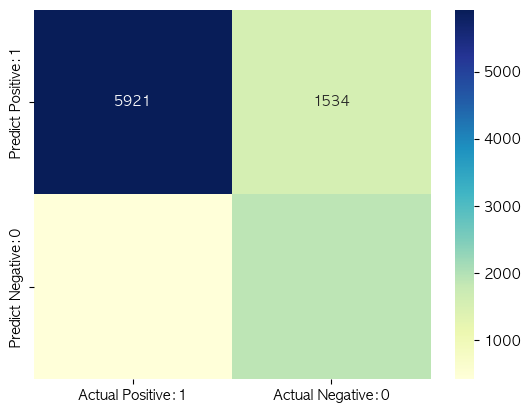

In [127]:
# 히트맵
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
            index=['Predict Positive:1', 'Predict Negative:0'])

sns. heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [130]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
# 그동안 봤던 점수들을 확인해볼 수 있다.

              precision    recall  f1-score   support

       <=50K       0.93      0.79      0.86      7455
        >50K       0.55      0.82      0.66      2314

    accuracy                           0.80      9769
   macro avg       0.74      0.81      0.76      9769
weighted avg       0.84      0.80      0.81      9769



In [131]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [132]:
classification_acc = (TP + TN) / float(TP+TN+FP+FN)
print('Classification Accuracy : {0:0.4f}'.format(classification_acc))

Classification Accuracy : 0.8005


In [136]:
classification_err = (FP+FN) / float(TP+TN+FP+FN)
print('Classification Error : {0:0.4f}'.format(classification_err))

Classification Error : 0.1995


In [139]:
precision =  TP / float(TP+FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7942


In [140]:
recall = TP / float(TP+FN)
print('Recall : {0:0.4f}'.format(recall))

Recall : 0.9345


In [142]:
# K-fold 교차검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-validation Scores : {}'.format(scores))

Cross-validation Scores : [0.79166667 0.79868421 0.80430013 0.79245283 0.79815709 0.80386134
 0.80122861 0.80078982 0.79596314 0.80342255]


In [143]:
# 교차검증의 정확도 출력
scores.mean()

0.799052639276999

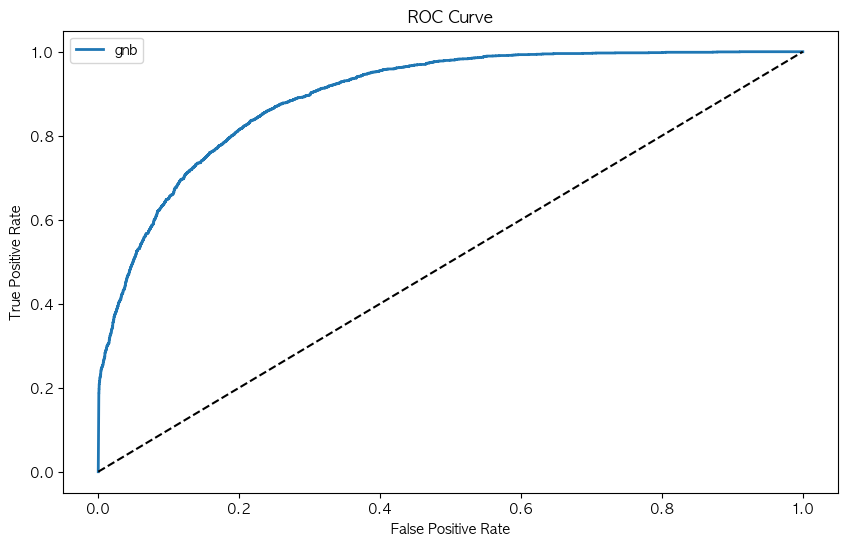

In [149]:
from sklearn.metrics import roc_curve

y_pred = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='>50K')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, linewidth=2, label='gnb')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [150]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC Score : {:.4f}'.format(roc_auc))

ROC AUC Score : 0.8957


# 분류 끝!